In [1]:
import pandas as pd
import numpy as np

## Tarea 4
Obtenga la base de datos de exoplanetas encontrados hasta el momento de
http://exoplanets.org/csv-files/exoplanets.csv y cree con este un
DataFrame(DF) de Pandas. Sobre ese DF realice las siguientes tareas.

In [2]:
#leyendo los datos
exoplanets=pd.read_csv('exoplanets.csv',low_memory=False)

## Punto 1

Como vamos a hacer un análisis sobre zona de habitabilidad, vamos a
necesitar que varios campos estén presentes. Asegúrese de que los datos
del DF contengan los siguientes items (Cree un DF solo con estos):


• NAME


• TEFF: temperatura efectiva de la estrella.


• MASS: Masa del planeta.


• A: semieje mayor.


• DENSITY: densidad.


• R: radio del planeta.


• STAR: Nombre de la estrella.


• MSTAR: Masa de la estrella.


• RSTAR: Radio de la estrella.


• BINARY: indica si el sistema es binario o no.

In [3]:
#creando un data frame con los datos
DF=pd.DataFrame(exoplanets)
#seleccionando las columnas que vamos a utilizar en un diccionario.
dicc={'NAME':(DF['NAME']),'TEFF':(DF['TEFF']),'MASS':(DF['MASS']),'A':(DF['A']),'DENSITY':(DF['DENSITY']),'R':(DF['R']),'STAR':(DF['STAR']),'MSTAR':(DF['MSTAR']),'RSTAR':(DF['RSTAR']),'BINARY':(DF['BINARY'])}
n=np.arange(5747) #Número de filas
df=pd.DataFrame(dicc,index=(n)) #Creación del data frame con el que si vamos a trabajar
df

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY
0,Kepler-107 d,5851.0,0.003712,0.078010,NaN,0.095459,Kepler-107,NaN,1.411,0.0
1,Kepler-1049 b,3864.0,0.002453,0.034472,NaN,0.085000,Kepler-1049,0.510,0.490,0.0
2,Kepler-813 b,5743.0,0.015970,0.137610,NaN,0.191000,Kepler-813,0.950,0.930,0.0
3,Kepler-427 b,5800.0,0.290000,0.091351,0.16,1.230000,Kepler-427,0.960,1.350,0.0
4,Kepler-1056 b,6127.0,0.027126,0.185149,NaN,0.269000,Kepler-1056,1.120,1.200,0.0
...,...,...,...,...,...,...,...,...,...,...
5742,KOI 7978.01,6297.0,0.012544,0.082100,NaN,0.148096,KOI 7978,1.398,2.219,NaN
5743,KOI 7982.01,6231.0,0.033310,1.028700,NaN,0.290838,KOI 7982,1.025,0.955,NaN
5744,KOI 8193.01,5570.0,0.045399,0.995500,NaN,0.331877,KOI 8193,0.971,0.855,NaN
5745,KOI 7986.01,6119.0,0.000983,0.029000,NaN,0.064234,KOI 7986,1.075,1.031,NaN


## Punto 2

Descarte los sistemas binarios i.e. BINARY==0.

In [4]:
c=df.mask(df['BINARY']==1) #quitando los exoplanetas para los cuales BINARY=1
c.dropna() #quitando los NaN para solo mostrar los valores de BINARY=0
#Ahora mi data frame se llama 'c'.

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY
3,Kepler-427 b,5800.0,0.290000,0.091351,0.160000,1.230000,Kepler-427,0.960,1.350,0.0
7,WASP-14 b,6475.0,7.692340,0.036769,4.656330,1.281000,WASP-14,1.310,1.310,0.0
10,WASP-105 b,5070.0,1.759220,0.074547,2.470230,0.981089,WASP-105,0.890,0.900,0.0
15,HAT-P-27 b,5190.0,0.617485,0.039949,0.771559,1.020000,HAT-P-27,0.920,0.870,0.0
34,WASP-21 b,5800.0,0.300272,0.052109,0.319200,1.070000,WASP-21,1.010,1.060,0.0
...,...,...,...,...,...,...,...,...,...,...
3216,OGLE-TR-182 b,5924.0,1.024500,0.051352,0.941500,1.130000,OGLE-TR-182,1.140,1.140,0.0
3245,WASP-1 b,6110.0,0.918000,0.038520,0.328000,1.550500,WASP-1,1.200,1.517,0.0
3246,XO-5 b,5510.0,1.152510,0.050865,1.270000,1.030000,XO-5,1.000,1.050,0.0
3247,HAT-P-3 b,5185.0,0.595712,0.038825,1.020000,0.899000,HAT-P-3,0.928,0.833,0.0


# Punto 3,4,5,6:

3.La masa de esos planetas está expresada en masas de jupiter, cree otra
columna que se llame MASSE en unidades de masa de la tierra.


4.Similarmente el radio de los planetas está expresada en términos del
radio de Jupiter, cree otra columna llamada RE, con los radios expresados
en radios terrestres.


5.Teniendo en cuenta que la luminosidad de una estrella se puede calcular
como $L = 4πR^{2}σT^{4}eff$ , donde R es el radio de la estrella σ la constante
de Stefan-Boltzmann (Recuerde usar las unidades correctas). Cree otra
columna llámela LUM y llénela con las luminosidades de las estrellas.

6.Calcule los limites de la zona de habitabilidad y asigne a estos las
columnas ri y ro.

In [5]:
c["MASSE"] = (c["MASS"]*317.907) #La masa en masas de la tierra
c['RE']=(c['R']*11.2089) #El radio del exoplaneta en radios de la tierra.
c['LUM']=(4*np.pi*c['R']*c['TEFF']*5.670373e-8) #Luminosidad en unidades solares.
c['ri']=((((0.72-2.7619e-5*(c['TEFF']-5780))-(3.8095e-9*(c['TEFF']-5780)**2)))*np.sqrt(c['LUM'])) #Límites de habitabilidad.
c['r0']=((((1.77-1.3786e-4*(c['TEFF']-5780))-(1.4286e-9*(c['TEFF']-5780)**2)))*np.sqrt(c['LUM']))
c

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,ri,r0
0,Kepler-107 d,5851.0,0.003712,0.078010,NaN,0.095459,Kepler-107,NaN,1.411,0.0,1.180179,1.069990,0.000398,0.014324,0.035115
1,Kepler-1049 b,3864.0,0.002453,0.034472,NaN,0.085000,Kepler-1049,0.510,0.490,0.0,0.779854,0.952757,0.000234,0.011610,0.031038
2,Kepler-813 b,5743.0,0.015970,0.137610,NaN,0.191000,Kepler-813,0.950,0.930,0.0,5.076879,2.140900,0.000782,0.020158,0.049627
3,Kepler-427 b,5800.0,0.290000,0.091351,0.16,1.230000,Kepler-427,0.960,1.350,0.0,92.193030,13.786947,0.005083,0.051295,0.126001
4,Kepler-1056 b,6127.0,0.027126,0.185149,NaN,0.269000,Kepler-1056,1.120,1.200,0.0,8.623577,3.015194,0.001174,0.024330,0.059012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,KOI 7978.01,6297.0,0.012544,0.082100,NaN,0.148096,KOI 7978,1.398,2.219,NaN,3.987903,1.659988,0.000665,0.018166,0.043780
5743,KOI 7982.01,6231.0,0.033310,1.028700,NaN,0.290838,KOI 7982,1.025,0.955,NaN,10.589346,3.259977,0.001291,0.025398,0.061360
5744,KOI 8193.01,5570.0,0.045399,0.995500,NaN,0.331877,KOI 8193,0.971,0.855,NaN,14.432589,3.719973,0.001317,0.026336,0.065288
5745,KOI 7986.01,6119.0,0.000983,0.029000,NaN,0.064234,KOI 7986,1.075,1.031,NaN,0.312479,0.719995,0.000280,0.011885,0.028837


# Punto 7

Haga un filtro que seleccione los planetas con alta probabilidad de ser
rocosos, i.e. que su densidad sea del orden o mayor que $5g/cm^{3}$. Muestre los resultados en una tabla.

In [6]:
T=c[c.DENSITY>=5] #Filtro para la densidad 
T

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,ri,r0
26,HD 3167 b,5261.0,0.015891,0.018149,5.60000,NaN,HD 3167,0.866,NaN,0.0,5.051860,NaN,NaN,NaN,NaN
174,WASP-18 b,6400.0,10.200600,0.020140,10.28090,1.267000,WASP-18,1.220,1.2160,0.0,3242.842144,14.201676,0.005778,0.053317,0.128005
318,Kepler-113 b,4725.0,0.013404,0.050274,10.73000,0.162370,Kepler-113,0.750,0.6900,0.0,4.261225,1.819989,0.000547,0.017417,0.044748
429,HAT-P-2 b,6290.0,8.870660,0.067909,7.29000,1.157000,HAT-P-2,1.308,1.5060,0.0,2820.044909,12.968697,0.005186,0.050763,0.122371
476,HD 219134 b,4699.0,0.014888,0.038727,6.28034,0.146486,HD 219134,0.810,0.7780,0.0,4.732904,1.641947,0.000490,0.016508,0.042463
492,Kepler-406 b,5538.0,0.019979,0.036144,11.82000,0.127576,Kepler-406,1.070,1.0700,0.0,6.351528,1.429987,0.000503,0.016300,0.040461
683,CoRoT-7 b,5275.0,0.014000,0.017190,6.21000,0.143989,CoRoT-7,0.930,0.8700,0.0,4.450698,1.613958,0.000541,0.017052,0.042789
958,Kepler-406 c,5538.0,0.008575,0.055553,24.39000,0.075832,Kepler-406,1.070,1.0700,0.0,2.726072,0.849992,0.000299,0.012567,0.031194
963,Kepler-39 b,6260.0,18.180500,0.155007,12.40000,1.220000,Kepler-39,1.100,1.3900,0.0,5779.708213,13.674858,0.005442,0.052071,0.125666
993,CoRoT-3 b,6740.0,21.854900,0.057379,26.40000,1.010000,CoRoT-3,1.370,1.5600,0.0,6947.825694,11.320989,0.004851,0.048055,0.113966


# Punto 8
Cree un filtro que seleccione los planetas dentro de la zona de habitabilidad.
Muestre los resultados en una tabla.

In [32]:
T1=c[c.A<c.r0] #Filtro para hallar los exoplanetas dentro de la zona de habitabilidad.
T2=T1[T1.A>T1.ri]
T2 #Data frame final con el que se realizarán los gráficos.

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,ri,r0
3,Kepler-427 b,5800.0,0.290000,0.091351,0.16000,1.230000,Kepler-427,0.960,1.350,0.0,92.193030,13.786947,0.005083,0.051295,0.126001
10,WASP-105 b,5070.0,1.759220,0.074547,2.47023,0.981089,WASP-105,0.890,0.900,0.0,559.268353,10.996928,0.003544,0.043918,0.111161
18,Kepler-207 b,5920.0,0.011730,0.026905,NaN,0.140066,Kepler-207,NaN,1.588,0.0,3.728890,1.569986,0.000591,0.017406,0.042554
21,Kepler-787 b,4248.0,0.006887,0.016133,NaN,0.114000,Kepler-787,0.650,0.620,0.0,2.189279,1.277815,0.000345,0.013995,0.036741
34,WASP-21 b,5800.0,0.300272,0.052109,0.31920,1.070000,WASP-21,1.010,1.060,0.0,95.458571,11.993523,0.004422,0.047843,0.117520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,KOI 7924.01,5058.0,0.000805,0.015400,NaN,0.060666,KOI 7924,0.827,0.739,NaN,0.255911,0.679995,0.000219,0.010912,0.027633
5717,KOI 7949.01,5521.0,0.000584,0.018200,NaN,0.055313,KOI 7949,0.821,0.734,NaN,0.185639,0.619996,0.000218,0.010723,0.026635
5718,KOI 7951.01,5806.0,0.004273,0.017700,NaN,0.097243,KOI 7951,0.996,0.899,NaN,1.358315,1.089992,0.000402,0.014427,0.035430
5725,KOI 8277.01,5651.0,0.000464,0.016300,NaN,0.051744,KOI 8277,0.998,0.953,NaN,0.147430,0.579996,0.000208,0.010443,0.025806


# Punto 9
Para los planetas dentro de la zona de habitabilidad grafique:

• La masa de las estrellas vs la distancia del planeta a su estrella
(scater).


• Distribución orbital de los planetas (histograma).


• Densidad Vs masa de las estrellas.


• Distancia a la estrella Vs Temperatura efectiva.

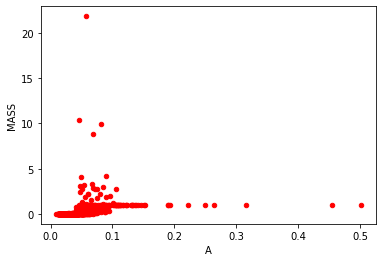

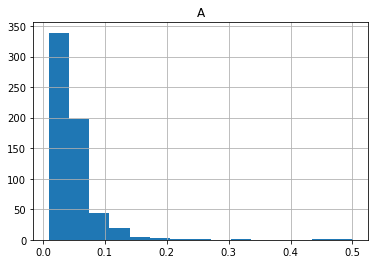

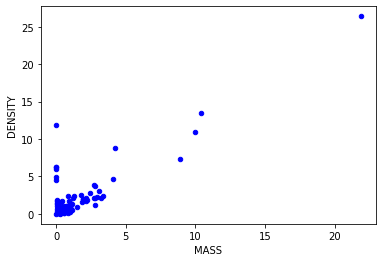

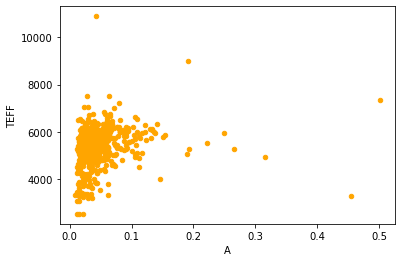

In [58]:
T2.plot(kind='scatter',x='A',y='MASS',c='r') #Gráfica de la distancia de cada planeta a su estrella vs masa
T2.hist('A',bins=15) #Histograma de la distribución orbital.
T2.plot(kind='scatter',x='MASS',y='DENSITY',c='b') #Gráfica de masa vs densidad.
T2.plot(kind='scatter',x='A',y='TEFF',c='orange') #Gráfica de distancia a la estrella vs temperatura efectiva.